## Machine Learning Demo

** Rasise: TODO  **   Insert Figure here of the Demo walk through flow, simple fig w/ boxes and arrows

Start by pulling some data from Source APIs which we will use for exploratory purposes and to understand more about the features we are selecting for our models.

In [1]:
from header_code import *
%matplotlib inline

In [2]:
display(user_catg_picker)
selected_category = user_catg_picker.value
print("You have selected data for: {}".format(selected_category))

You have selected data for: Education & Reference


In [3]:
# Pulling nodeID data from source APIs using methods from EDA_source_API.py
node_ids_jsn = getNodeIds(selected_category.split(",")) #get list of nodeIDs from source API
nodeId_lst = [x['nodeID'] for x in node_ids_jsn]
print ("Number of Node Ids based on selected Category: ", selected_category, len(nodeId_lst))
print ("\n", nodeId_lst)

('Number of Node Ids based on selected Category: ', 'Education & Reference', 208)
('\n', [2732, 11661, 2737, 11686, 10020691011, 3176, 3564978011, 8944243011, 8944244011, 3351944011, 69802, 69803, 69804, 15356861, 69805, 69806, 69807, 69808, 69809, 69810, 3190, 2917, 2918, 15356871, 2919, 2920, 69281, 2922, 2923, 2924, 2925, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 8951191011, 2950, 2955, 2963, 2965, 3022, 3188, 3253, 3254, 3255, 3256, 3258, 3260, 171106, 3189, 3182, 3183, 3184, 3185, 3186, 10166936011, 3187, 7009082011, 3177, 3178, 16244021, 3179, 3180, 7009139011, 3206, 3192, 7009083011, 3209, 3210, 3211, 3212, 3214, 3215, 3216, 3217, 3220, 16244041, 3221, 3208, 3261, 3262, 3263, 8883929011, 8883930011, 3267, 3270, 3273, 3274, 16244061, 3278, 3279, 3280, 3283, 3301, 3200, 3201, 3203, 3204, 3344092011, 10367686011, 10367687011, 10367688011, 10367689011, 10379660011, 10367690011, 17433, 10367691011, 10367692011, 10367693011, 10367694011, 10367676011, 1036769501

#### Node IDs for a given category. Need to cross reference with nodeIDs used in ML model. Create a filter and mapping and then export that data into a statistical visual to examine the underlying properties of the model's data set for that category.

In [4]:
# Pull supercategory mappings into a dict
mappings = get_supercat_mappings()

In [5]:
# Compare the nodeIDs from the selected category, compare them to the mapping of the known 75 nodeIDs and 
# return the nodeID along with with the super cetegory number as a dict.
nodeID_supercat = {}
for nodeid in nodeId_lst:
    if nodeid in mappings:
        nodeID_supercat[nodeid] = mappings[nodeid]
print('For category: {} \nAssociated nodeIDs of interest w/ super categories: \n{}'
      .format(selected_category,nodeID_supercat))

For category: Education & Reference 
Associated nodeIDs of interest w/ super categories: 
{3200: 2, 2945: 4, 2946: 2, 8951191011: 2, 2950: 1, 16244041: 2, 3279: 2, 3179: 1, 3214: 1, 3215: 2, 3185: 2, 2963: 3, 3188: 1, 3220: 4, 3564978011: 2, 16244061: 2, 3262: 2, 3263: 1}


** Rasise: TODO  **   Facet Code integration with Suman's code.

### Let's explore the training data a bit and get a feel for our features

In this section, we use FACETS Overview which takes input feature data of 4 supercategories, analyzes them feature by feature and visualizes the analysis.
Overview gives users a quick understanding of the distribution of values across the features of their dataset(s). Uncover several uncommon and common issues such as: 
- unexpected feature values 
- missing feature values for a large number of observation
- training/serving skew 
- and train/test/validation set skew.

For each supercategory, we will analyze 16 unique features that describe below:
- **total_sales_volume:** Total sales volume of current month
- **total_sales_price:** Total sales in dollars of current month
- **pm_total_sales_volume:** Total sales volume of the previous month
- **pm_total_sales_price:**  Total sales price of the previous month
- **l3m_total_sales_volume:**  Total sales volume of previous 3 months
- **l3m_total_sales_price:**  Total sales price of previous 3 months
- **l12m_total_sales_volume:** Total sales volume of previous 12 months 
- **l12m_total_sales_price:**  Total sales price of previous 12 months 
- **pm_numreviews:**  Number of reviews of previous month
- **pm_avgrating:**  The average rating of previous month
- **l3m_numreviews:**  Number of reviews of previous 3 months
- **l3m_avgrating:**  The average rating of previous 3 months
- **l12m_numreviews:**  Number of reviews of previous 12 months
- **l12m_avgrating:**  The average rating of previous 12 months 
- **numreviews:**  Number of reviews of current month
- **avgrating:**  The average rating of current month


** Rasise: TODO  ** Sme of Chris' facet code is below. I can't install bazel past 0.4 and its 0.8 now, I need to rebuild my env and I dont have time at the moment. We can run this demo on chris' mac book. wednesday or monday we can sit down with him hopefully and integrate his facet code up here. It is pretty much done.


### Let's run some predictions for a category and see how well our trained models perform

In [6]:
# uses the regression models to predict the number of books sold given a list of nodeIds
# also calls def findSuperCats(): returns the supercategories for a list of nodeIDs.
known_supercats = list(set(nodeID_supercat.values())) # pass to the function the category's mapped Super Category's
predictions = predict_model(nodeId_lst, known_supercats)

In [7]:
predictions.sample(20)

,nodeid,month,yr,total_sales_volume,predicted books sold,error
438,3215,9.0,2013.0,19,22.468486,-3.468486
399,3200,1.0,2014.0,5,11.271844,-6.271844
1000,16244061,11.0,2012.0,39,15.358301,23.641699
313,3185,6.0,2011.0,12,17.787771,-5.787771
966,16244061,2.0,2015.0,7,21.861978,-14.861978
16,2945,2.0,2011.0,5,3.501931,1.498069
972,16244061,4.0,2013.0,75,57.932969,17.067031
955,16244041,12.0,2012.0,59,55.394589,3.605411
939,16244041,9.0,2012.0,82,21.085021,60.914979
366,3200,7.0,2012.0,26,11.409418,14.590582


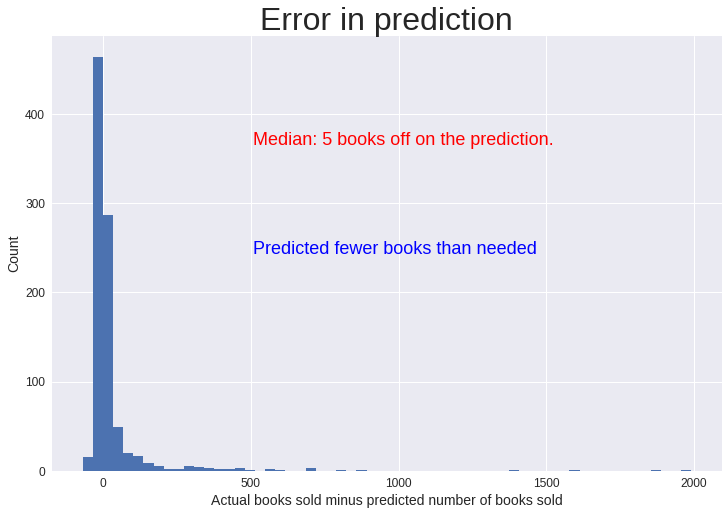

In [11]:
error_plotter(predictions) #plot the prediction error for this category

In [25]:
print('The median number of books we are off is: {:.0f} books'.format(predictions['error'].abs().round().median()))
print('The mean number of books (MAE) we are off is: {:.0f} books'.format(np.abs(predictions['error']).mean()))
print('The standard deviation of books we are off is: {:.0f} books'.format(predictions['error'].std()))
print('The MSE is: {:,.2f}'.format(np.power(predictions['error'],2).mean()))

The median number of books we are off is: 5 books
The mean number of books (MAE) we are off is: 38 books
The standard deviation of books we are off is: 145 books
The MSE is: 21,868.36


# Facet code for EDA is below.... Need to install facets/bazel or use chris' laptop and then move this code up and test it. It has no bearing on the rest of the demo though. Should be pretty easy to incorporate.

In [18]:
# Load supercategory 1, 2, 3 and 4 csv files into a pandas dataframe


features = ['id', 'nodeid', 'year', 'month', 'total_sales_volume', 'total_sales_price', 'pm_total_sales_volume', \
            'pm_total_sales_price', 'l3m_total_sales_volume', 'l3m_total_sales_price',  \
            'l12m_total_sales_volume', 'l12m_total_sales_price', 'pm_numreviews', 'pm_avgrating', \
            'l3m_numreviews', 'l3m_avgrating', 'l12m_numreviews', 'l12m_avgrating', 'numreviews', \
            'avgrating']

#supercat1 = pd.read_csv('ML_feat_cat1.csv', 
#                 index_col = ['nodeid', 'mon', 'year'],  \
#                 names=features,skiprows=[0], dtype=np.float32)

#supercat2 = pd.read_csv('ML_feat_cat2.csv', 
#                 index_col = ['nodeid', 'mon', 'year'],  \
#                 names=features,skiprows=[0], dtype=np.float32)

#  pd.read_csv('ML_feat_cat3.csv',  \
#                 index_col = ['nodeid', 'mon', 'year'],  \
#                 names=features, skiprows=[0], dtype=np.float32)

#supercat3 = pd.read_csv("ML_feat_cat3.csv", index_col = ['nodeid', 'mon', 'yr'], \
#                       )

supercat3 = pd.read_csv('jit_data/ML_feat_cat3.csv', \
                       index_col = ['nodeid', 'year', 'month'], names=features, skiprows=[0], dtype=np.float32)
supercat3.drop('id', axis = 1, inplace=True)

supercat4 = pd.read_csv('jit_data/ML_feat_cat4.csv', \
                       index_col = ['nodeid', 'year', 'month'], names=features, skiprows=[0], dtype=np.float32)                        
supercat4.drop('id', axis = 1, inplace=True)      

# Unit Test:  Ensure data is read in correctly to the dataframe
supercat4

total_sales_volume  total_sales_price  \
nodeid       year   month                                          
2.945000e+03 2009.0 10.0               1880.0       18760.000000   
                    11.0                376.0        3455.000000   
                    12.0                280.0        2055.000000   
             2010.0 1.0                  52.0         460.000000   
                    2.0                  72.0         200.000000   
                    3.0                 114.0         130.000000   
                    4.0                   3.0          10.000000   
                    5.0                  14.0          90.000000   
                    6.0                   6.0          40.000000   
                    7.0                   3.0          20.000000   
                    8.0                  24.0         130.000000   
                    9.0                   5.0           0.000000   
                    10.0                  0.0           0.000000   
                    11.0                  3.0          30.000000   
                    12.0                  9.0          78.500000   
             2011.0 1.0                   4.0          38.900002   
                    2.0                   5.0          46.700001   
                    3.0                   2.0          20.000000   
                    4.0                   1.0          10.000000   
                    5.0                   2.0          18.900000   
                    6.0                   0.0           0.000000   
                    7.0                   2.0          24.700001   
                    8.0                   0.0           0.000000   
                    9.0                   1.0          11.520000   
                    10.0                  2.0          25.900000   
                    11.0                 11.0          12.950000   
                    12.0                  8.0          99.440002   
             2012.0 1.0                   4.0          48.939999   
                    2.0                   1.0          12.950000   
                    3.0                   3.0          35.990002   
...                                       ...                ...   
9.432900e+09 2014.0 3.0                 158.0        4521.890137   
                    4.0                  93.0        2946.780029   
                    5.0                 137.0        4307.509766   
                    6.0                 102.0        3238.449951   
                    7.0                  42.0        1342.900024   
                    8.0                  11.0         304.970001   
                    9.0                  17.0         532.950012   
                    10.0                 25.0         762.299988   
                    11.0                  5.0         129.300003   
                    12.0                 10.0         325.500000   
             2015.0 1.0                   9.0          97.849998   
                    2.0                   8.0          80.309998   
                    3.0                   1.0          31.450001   
                    4.0                   1.0          31.950001   
                    5.0                   2.0          66.400002   
                    6.0                   2.0          66.400002   
                    7.0                   4.0          86.250000   
                    8.0                  46.0         821.099976   
                    9.0                   2.0          66.400002   
                    10.0                  1.0          34.950001   
                    11.0                  6.0         203.080002   
                    12.0                  2.0          62.849998   
             2016.0 1.0                   0.0           0.000000   
                    4.0                   2.0          62.910000   
                    5.0                   1.0          34.950001   
                    6.0                   0.0           0.000000   
               

In [125]:
# Calculate the feature statistics proto from the datasets and stringify it for use in facets overview
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'supercat3', 'table': supercat3},
                                  {'name': 'supercat4', 'table': supercat4}])

protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")



In [126]:
# Visualize data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

